                                    Exploratory Data Analysis (EDA)

                                         Census Income DataSet
Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

Details of dataset: (https://archive.ics.uci.edu/ml/machine-learning-databases/adult/)


In [1]:
#import necesary library and tools
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Data ingestion from github
datalink="https://raw.githubusercontent.com/ayan-zz/adult_census_income/main/adult.csv"
data=pd.read_csv(datalink,header=None, sep=',\s')

In [3]:
header=['age','workclass','fnl-wgt','education','education-num','marital status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native_country','income']
df=pd.DataFrame(data)
df.columns=header
df.head()

,age,workclass,fnl-wgt,education,education-num,marital status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
df_cat=[feature for feature in df.columns if df[feature].dtype=='O']
df_num=[feature for feature in df.columns if df[feature].dtype!='O']
print("Categorical features include:\n",df_cat)
print("Numerical features include:\n",df_num)

Categorical features include:
 ['workclass', 'education', 'marital status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']
Numerical features include:
 ['age', 'fnl-wgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


Initial Observation:
1. Total categorical features: 08 total numerical features: 06 Target/output feature: Income
2. Many datapoints are having '?' values in categorical features: workclass, occupation, native_country
3. Income is in categorical form '<=50k' and '>=50k'
4. Total gain or loss of capital is separated by capital gain and capital loss
 



Initial Tasks:

1. Modify the categorical features
2. Replace the '?' datapoints
3. Income field can be replaced by 0 and 1 values
4. Combining total gain and loss into Capital_gain/loss 
5. Numerical feature 'age' can be replaced by binned age for better understanding off data
6. Categorical feature 'capital_gain/loss' can be binned as no-gain,gain,high-gain
7. Check for datatypes and nan/null values
8. Taking action on null/nan values
9. Dropping the duplicates
10. Bringing insights on numerical datas by correlation and heatmap
11. Comparing numerical data with cateorical features
12. Observing the distribution of target features with rest of data 

In [5]:
#Data Transformation
df['workclass']=df['workclass'].replace({'?': 'Private'})
df['occupation']=df['occupation'].replace({'?': 'Prof-specialty'})
df['income']=df['income'].replace({'<=50K': 0,'<50K':0,'>=50K': 1,'>50K': 1})

In [6]:
df['income'].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [7]:
df['capital gain/loss']=df['capital-gain']-df['capital-loss']
df=df.drop(columns=['capital-gain','capital-loss'])

In [8]:
df.head()

,age,workclass,fnl-wgt,education,education-num,marital status,occupation,relationship,race,sex,hours-per-week,native_country,income,capital gain/loss
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,2174
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0


In [9]:
d=np.sort(df['hours-per-week'].unique())
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       70, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 84, 85, 86, 87, 88, 89,
       90, 91, 92, 94, 95, 96, 97, 98, 99], dtype=int64)

In [10]:
#we convert the hours per week into bins of size 0-20,20-40,40-60,60-80,80-100.
bins = [0, 20,  40, 60, 80, 100]
labels=['0-20','20-40','40-60','60-80','80-100']
df['binned_hours'] = pd.cut(df['hours-per-week'], bins, labels=labels)

In [11]:
df['binned_hours'].value_counts()

20-40     20052
40-60      8471
0-20       2928
60-80       902
80-100      208
Name: binned_hours, dtype: int64

In [12]:
bins = [0, 20,  40, 60, 80, 100]
labels=['0-20','20-40','40-60','60-80','80-100']
df['binned_age'] = pd.cut(df['age'], bins, labels=labels)

In [13]:
df['binned_age'].value_counts()

20-40     16708
40-60     11111
0-20       2410
60-80      2233
80-100       99
Name: binned_age, dtype: int64

In [14]:
bins = [-10000,0,10000,1000000]
labels =['no-gain','gain','high-gain']
df['capital_gain/loss'] = pd.cut(df['capital gain/loss'], bins,labels=labels)

In [15]:
df['capital_gain/loss'].value_counts()

no-gain      29849
gain          1942
high-gain      770
Name: capital_gain/loss, dtype: int64

In [16]:
df.isna().sum()

age                  0
workclass            0
fnl-wgt              0
education            0
education-num        0
marital status       0
occupation           0
relationship         0
race                 0
sex                  0
hours-per-week       0
native_country       0
income               0
capital gain/loss    0
binned_hours         0
binned_age           0
capital_gain/loss    0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   age                32561 non-null  int64   
 1   workclass          32561 non-null  object  
 2   fnl-wgt            32561 non-null  int64   
 3   education          32561 non-null  object  
 4   education-num      32561 non-null  int64   
 5   marital status     32561 non-null  object  
 6   occupation         32561 non-null  object  
 7   relationship       32561 non-null  object  
 8   race               32561 non-null  object  
 9   sex                32561 non-null  object  
 10  hours-per-week     32561 non-null  int64   
 11  native_country     32561 non-null  object  
 12  income             32561 non-null  int64   
 13  capital gain/loss  32561 non-null  int64   
 14  binned_hours       32561 non-null  category
 15  binned_age         32561 non-null  category
 16  capi

In [18]:
df_cat=[feature for feature in df.columns if df[feature].dtype=='object']
df_num=[feature for feature in df.columns if df[feature].dtype=='int64']
print("Categorical features include:\n",df_cat)
print("Numerical features include:\n",df_num)

Categorical features include:
 ['workclass', 'education', 'marital status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
Numerical features include:
 ['age', 'fnl-wgt', 'education-num', 'hours-per-week', 'income', 'capital gain/loss']


In [19]:
df[df_num].describe()

,age,fnl-wgt,education-num,hours-per-week,income,capital gain/loss
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,40.437456,0.240810,990.345014
std,13.640433,1.055500e+05,2.572720,12.347429,0.427581,7408.986951
min,17.000000,1.228500e+04,1.000000,1.000000,0.000000,-4356.000000
25%,28.000000,1.178270e+05,9.000000,40.000000,0.000000,0.000000
50%,37.000000,1.783560e+05,10.000000,40.000000,0.000000,0.000000
75%,48.000000,2.370510e+05,12.000000,45.000000,0.000000,0.000000
max,90.000000,1.484705e+06,16.000000,99.000000,1.000000,99999.000000


In [20]:
df.corr()

,age,fnl-wgt,education-num,hours-per-week,income,capital gain/loss
age,1.000000,-0.076646,0.036527,0.068756,0.234037,0.074284
fnl-wgt,-0.076646,1.000000,-0.043195,-0.018768,-0.009463,0.000988
education-num,0.036527,-0.043195,1.000000,0.148123,0.335154,0.117891
hours-per-week,0.068756,-0.018768,0.148123,1.000000,0.229689,0.075207
income,0.234037,-0.009463,0.335154,0.229689,1.000000,0.214428
capital gain/loss,0.074284,0.000988,0.117891,0.075207,0.214428,1.000000


<AxesSubplot:>

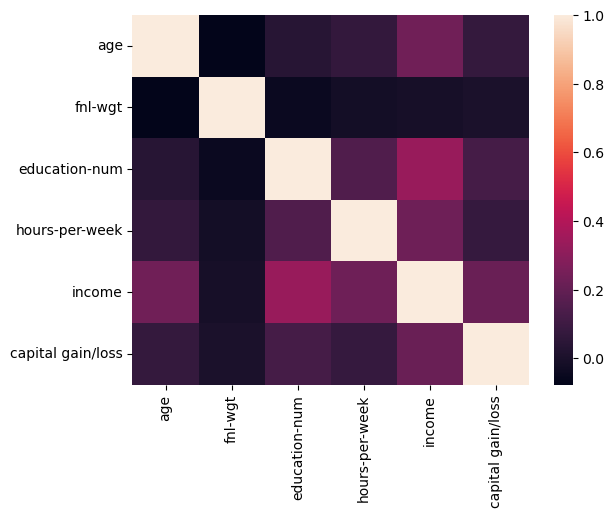

In [21]:
sns.heatmap(df.corr())

Final-weight is having high correlation. The following assumption made from research paper and analysis:
The weights on the CPS files are controlled to independent estimates of the civilian noninstitutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau.  We use 3 sets of controls.
These are:
1.  A single cell estimate of the population 16+ for each state.
2.  Controls for Hispanic Origin by age and sex.
3.  Controls by Race, age and sex.

Hence dropping the feature

In [22]:
df.drop(columns=['fnl-wgt'],inplace=True)

In [23]:
df.head()

,age,workclass,education,education-num,marital status,occupation,relationship,race,sex,hours-per-week,native_country,income,capital gain/loss,binned_hours,binned_age,capital_gain/loss
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,2174,20-40,20-40,gain
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0,0-20,40-60,no-gain
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0,20-40,20-40,no-gain
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0,20-40,40-60,no-gain
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0,20-40,20-40,no-gain


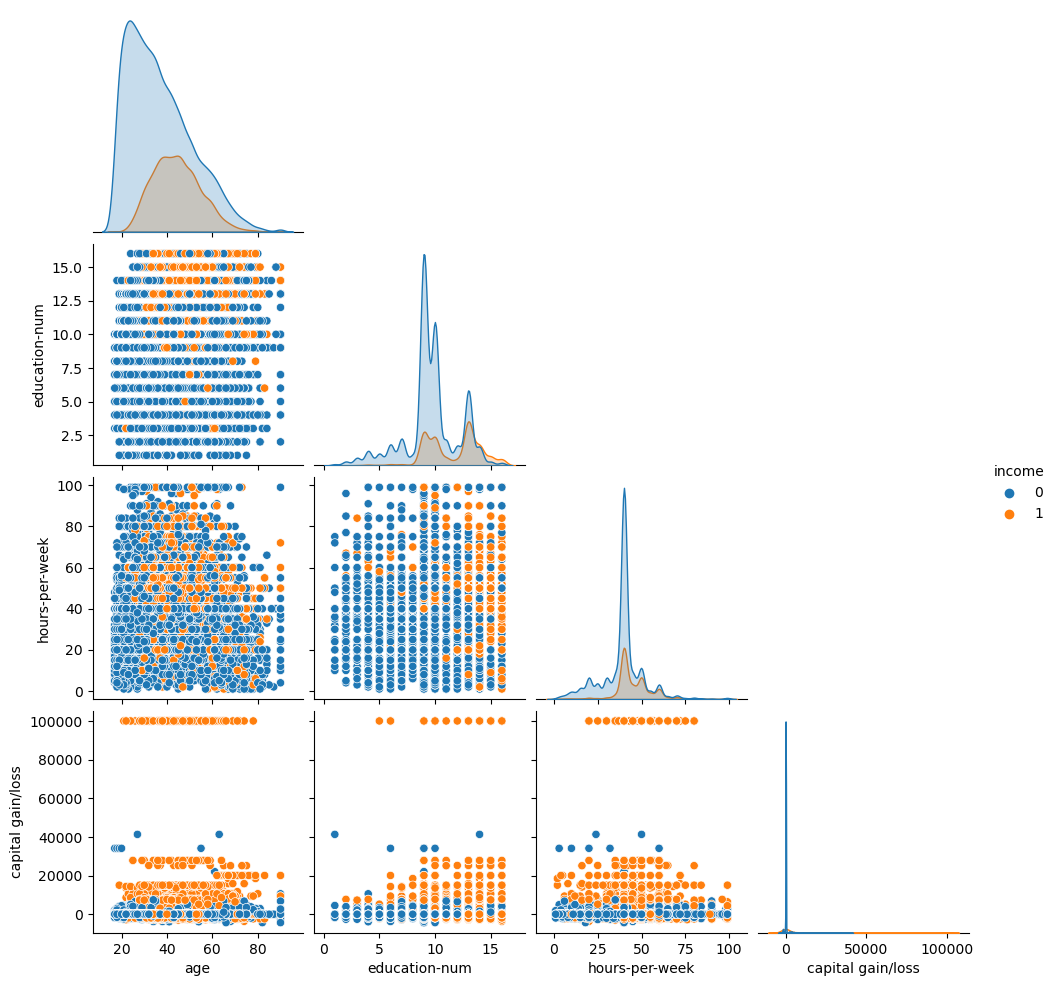

In [24]:
sns.pairplot(df,hue='income',corner=True)
plt.show()

<AxesSubplot:xlabel='native_country', ylabel='count'>

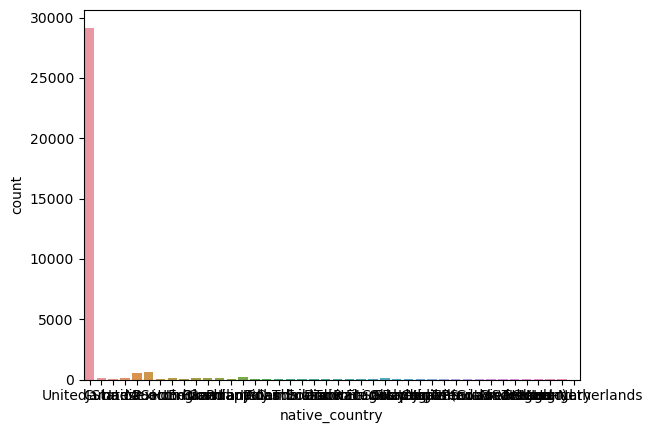

In [25]:
sns.countplot(data=df,x='native_country')

In [26]:
df['native_country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

In [27]:
df['native_country'].unique()


array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [28]:
dd=df[df['native_country']=='?']
dd['race'].value_counts()

White                 386
Black                  96
Asian-Pac-Islander     83
Other                  18
Name: race, dtype: int64

From the above observation its affirmed that United States data is in high number where as other country'scontribution is very less. A large number of data are narked as '?'. We see that out of these data all people has a race of White/ Black/Asia Pac Islander which belongs nearly the American region. Hence we can consider them as 'United States'. We will re-group other contries on separate bins and United States as is.

In [29]:
othrs=[ 'Cuba', 'Jamaica', 'South', 'Honduras', 'England', 'Iran', 'Italy', 'Poland', 'Columbia', 'Cambodia','Thailand',
'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal','Dominican-Republic',  'France', 'Guatemala','China', 'Japan',
'Yugoslavia', 'Peru','Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago','Greece', 'Nicaragua', 'Vietnam', 'Hong', 
'Ireland', 'Hungary','Holand-Netherlands']


df["native_country"] = np.where(df["native_country"]=='?','United-States',df["native_country"])
df['native_country']=df['native_country'].replace(to_replace=othrs,value='others')
df['native_country'].value_counts()

United-States    29753
others            1389
Mexico             643
Philippines        198
Germany            137
Canada             121
Puerto-Rico        114
El-Salvador        106
India              100
Name: native_country, dtype: int64

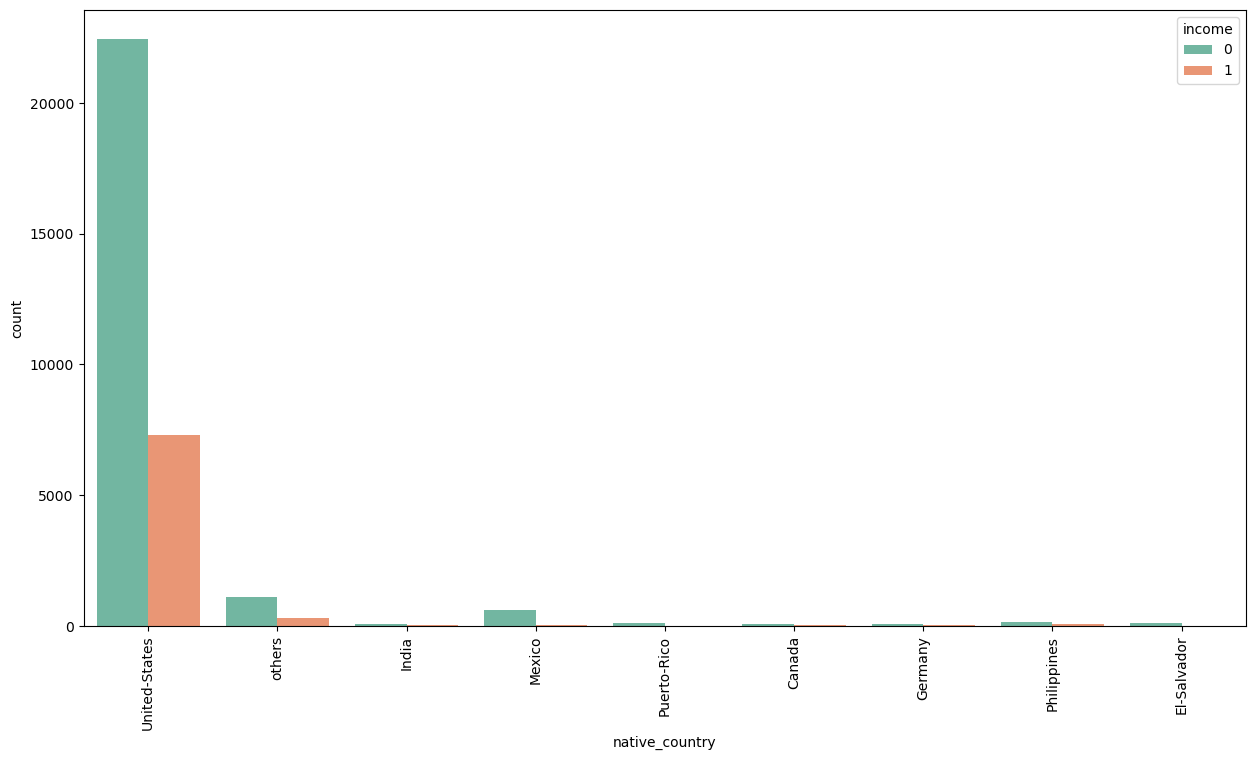

In [30]:
fig, axs = plt.subplots(1, 1, figsize=(15,8))
plt.subplot(111)
sns.countplot(data=df,x='native_country',hue='income',palette='Set2')
plt.xticks(rotation=90)
plt.show()

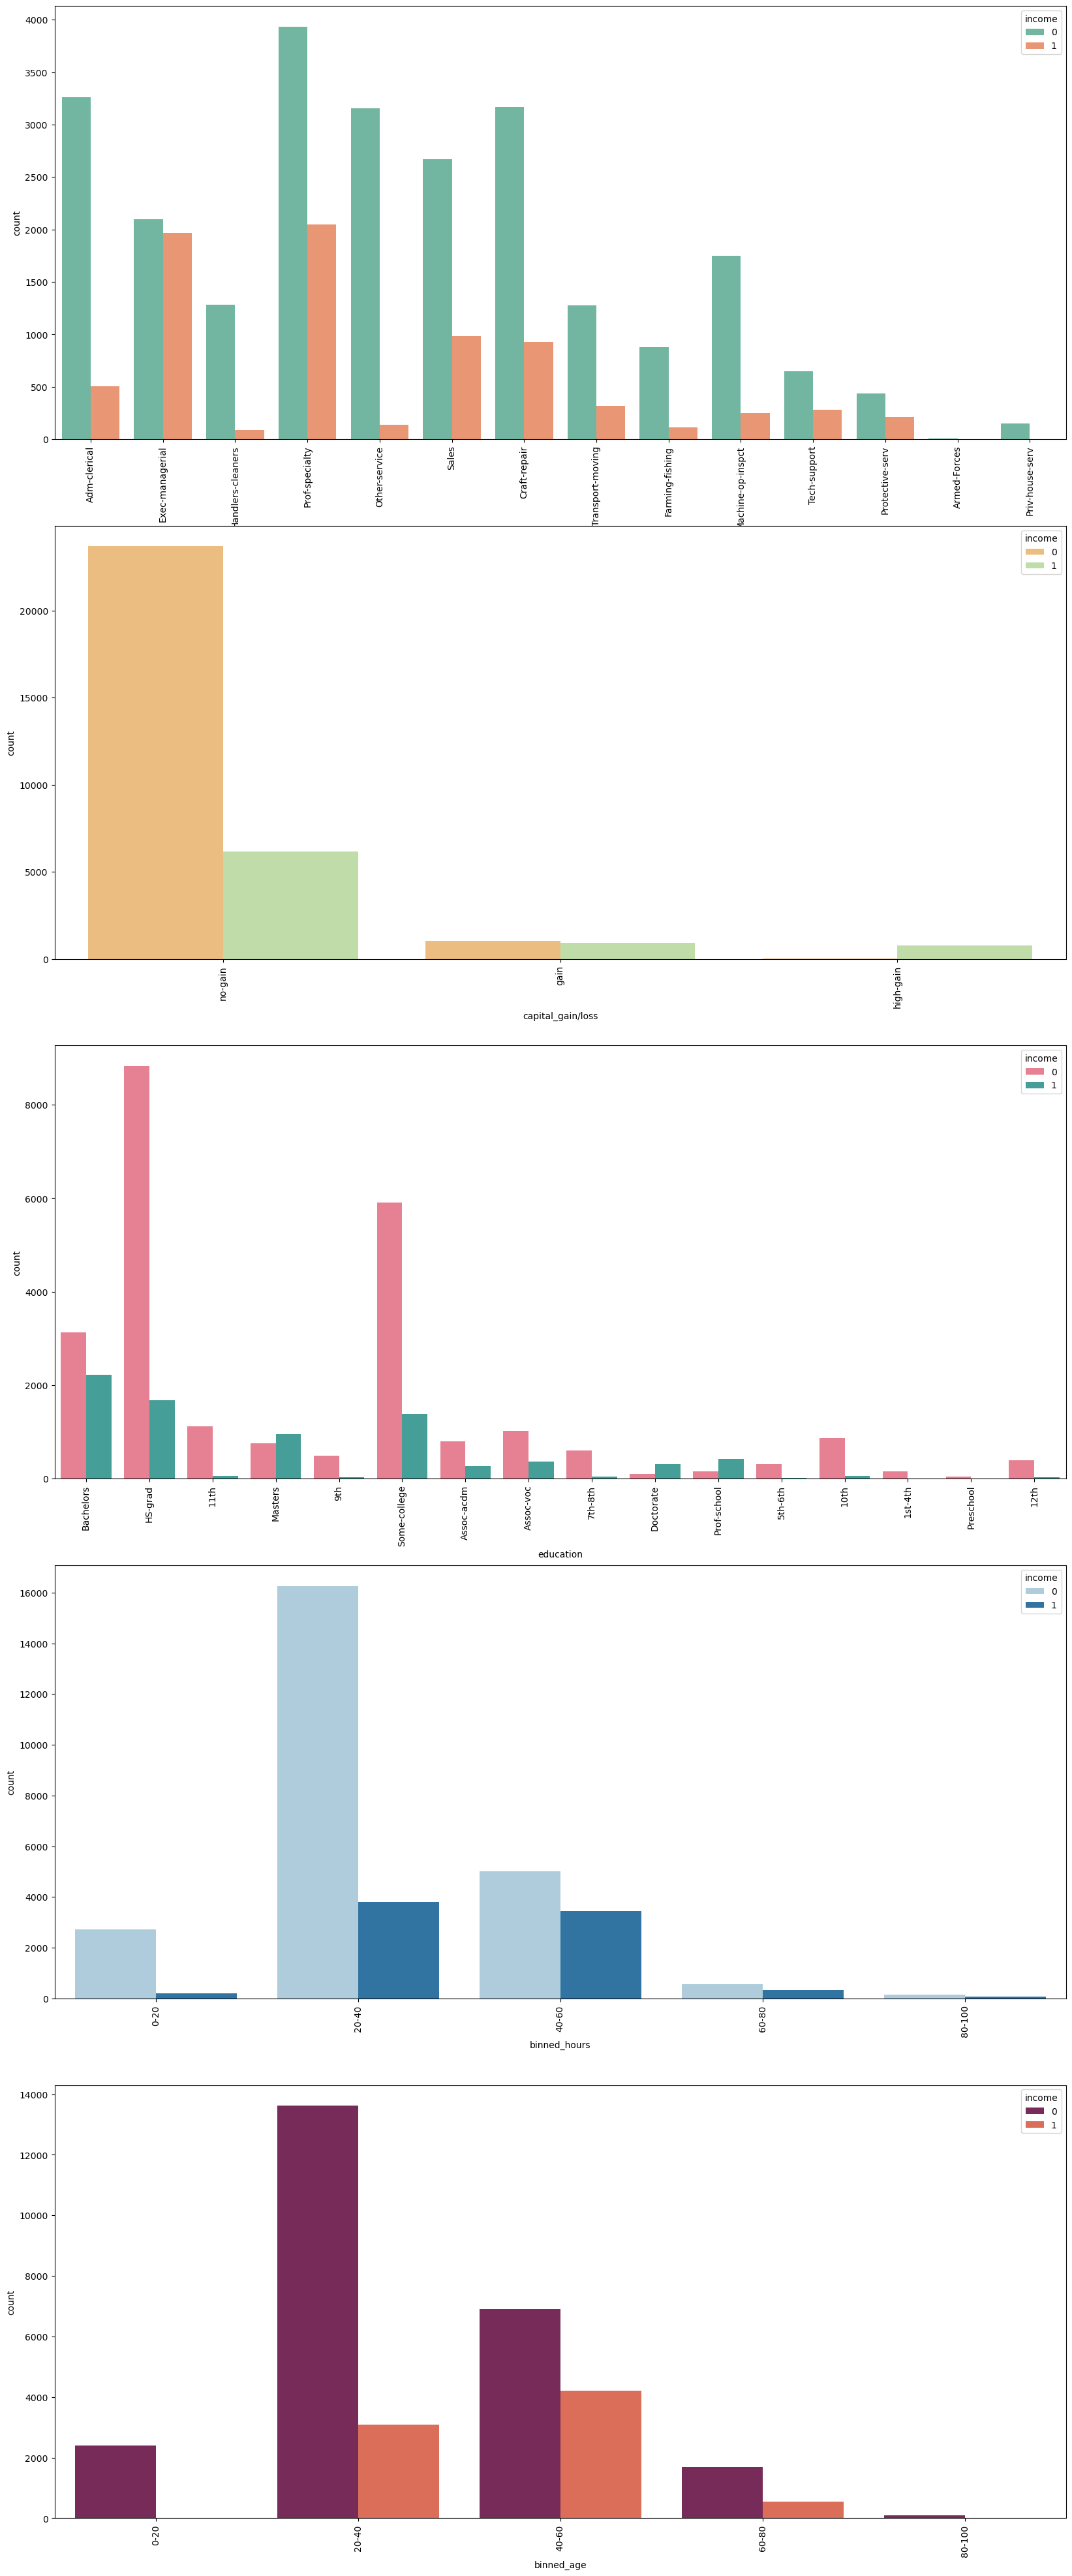

In [31]:
fig, axs = plt.subplots(1, 1, figsize=(20,50))
plt.subplot(511)
sns.countplot(data=df,x='occupation',hue='income',palette='Set2')
plt.xticks(rotation=90)
plt.subplot(512)
sns.countplot(data=df,x='capital_gain/loss',hue='income',palette='Spectral')
plt.xticks(rotation=90)
plt.subplot(513)
sns.countplot(data=df,x='education',hue='income',palette='husl')
plt.xticks(rotation=90)
plt.subplot(514)
sns.countplot(data=df,x='binned_hours',hue='income',palette='Paired')
plt.xticks(rotation=90)
plt.subplot(515)
sns.countplot(data=df,x='binned_age',hue='income',palette='rocket')
plt.xticks(rotation=90)
plt.show()

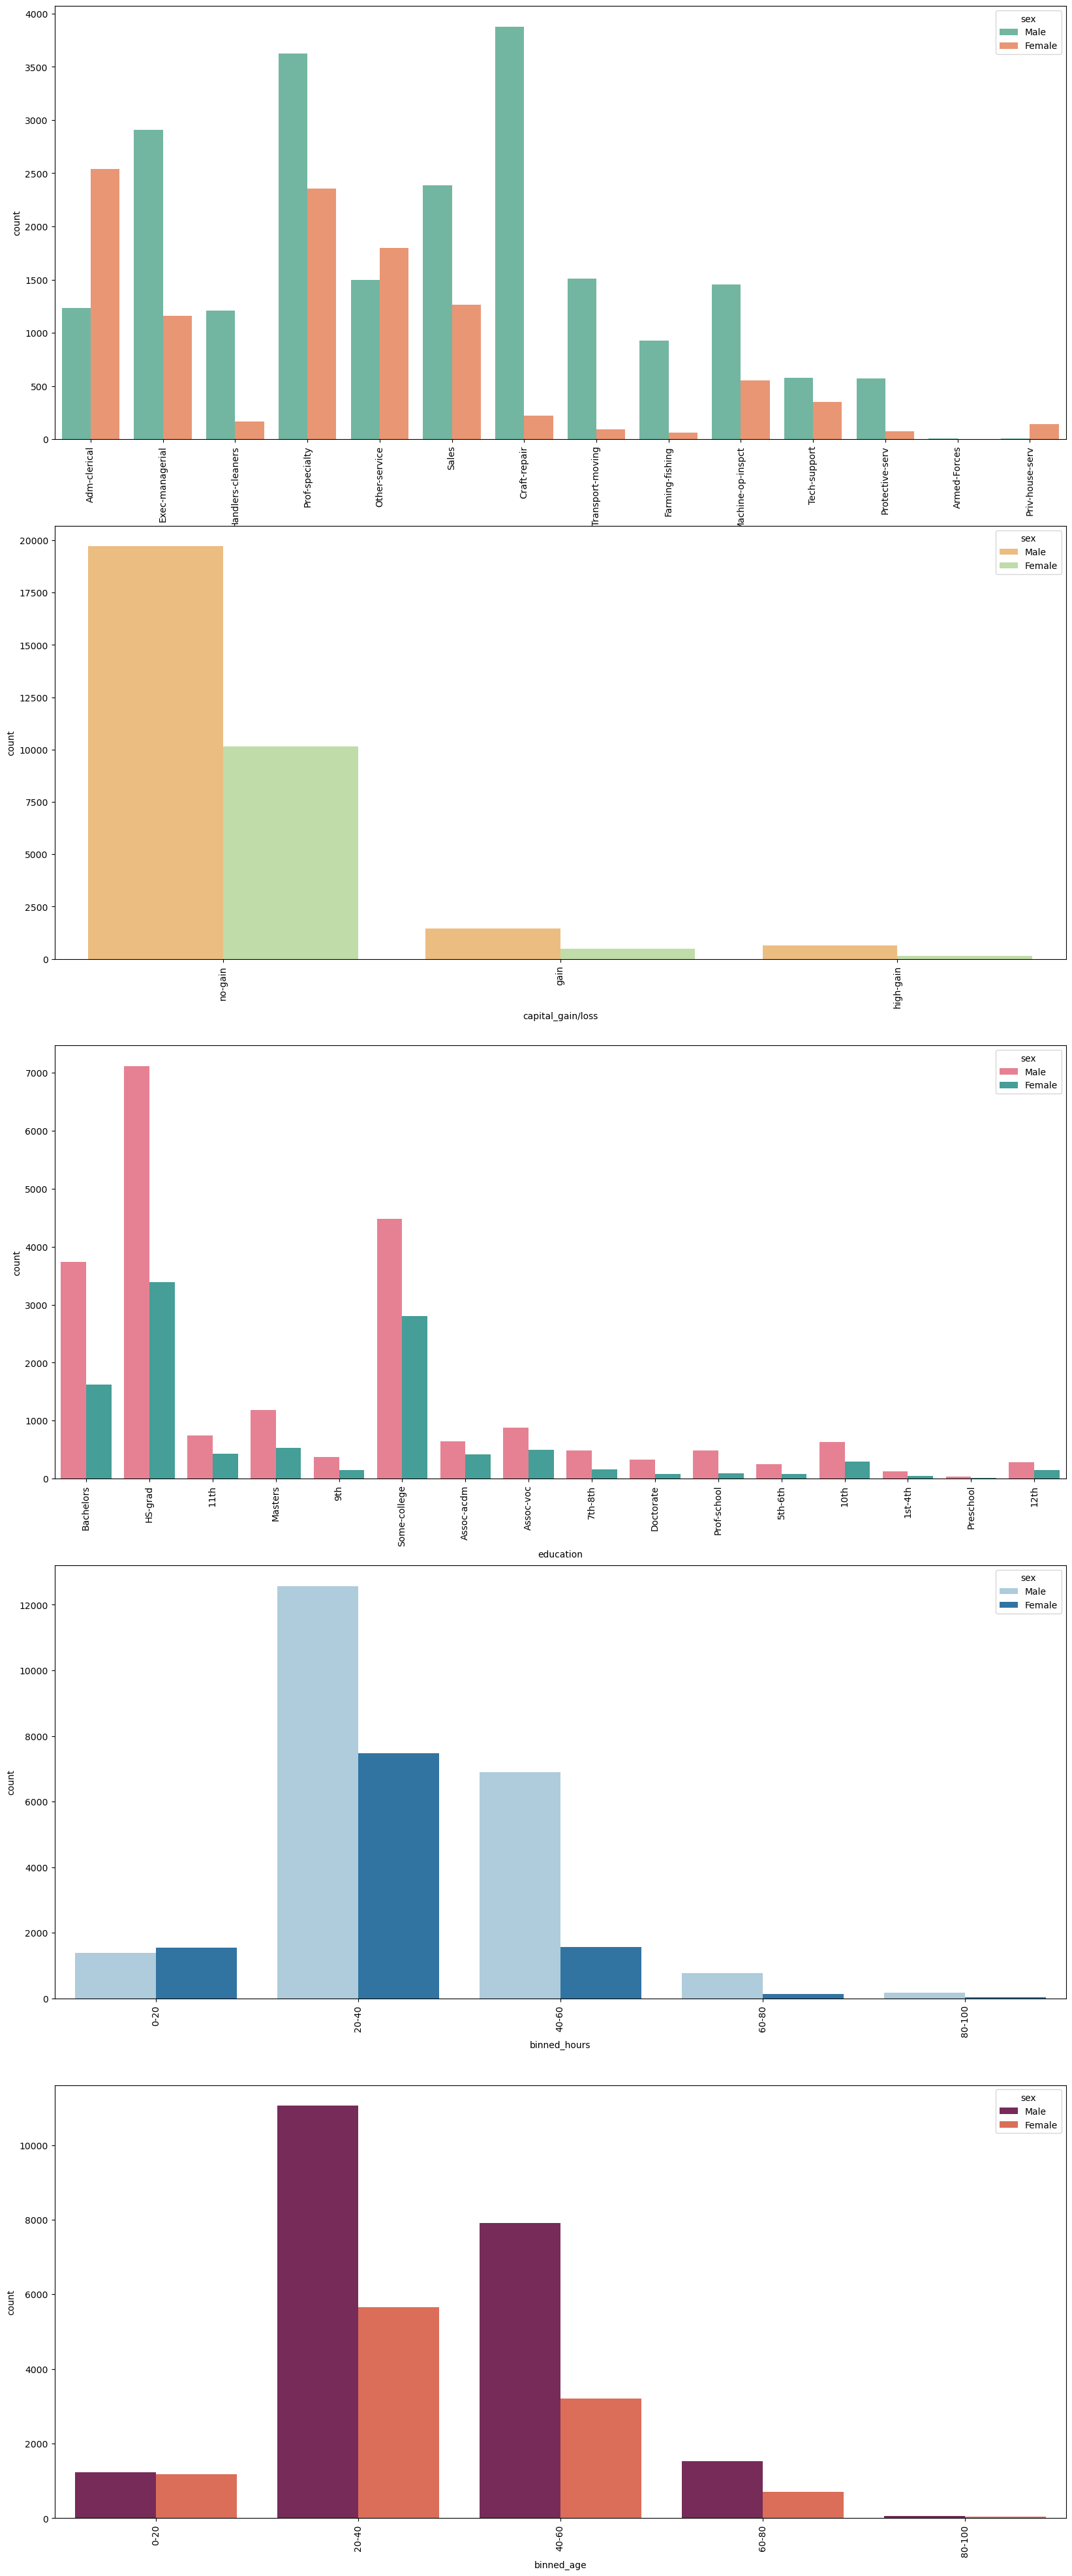

In [32]:
fig, axs = plt.subplots(1, 1, figsize=(20,50))
plt.subplot(511)
sns.countplot(data=df,x='occupation',hue='sex',palette='Set2')
plt.xticks(rotation=90)
plt.subplot(512)
sns.countplot(data=df,x='capital_gain/loss',hue='sex',palette='Spectral')
plt.xticks(rotation=90)
plt.subplot(513)
sns.countplot(data=df,x='education',hue='sex',palette='husl')
plt.xticks(rotation=90)
plt.subplot(514)
sns.countplot(data=df,x='binned_hours',hue='sex',palette='Paired')
plt.xticks(rotation=90)
plt.subplot(515)
sns.countplot(data=df,x='binned_age',hue='sex',palette='rocket')
plt.xticks(rotation=90)
plt.show()

# Observations

### 1. Income Generation:
####    i) Occupation of people having 'Exec-managerial' and 'Prof-speciality' are having higher income generation (>=50k) whereas   Armed forces and Pri-House Serv are having minimal income(<=50). 
####    ii) People completed their bachelorate degree have more chance of getting an income generation of >=50k.
####    iii) Higher income is found in the 40-60 yrs age group of people.
####    iv) Maximum number of people in <=50k range of income are of 20-40 years age group and are working more hours per week than others.
####    v) Neutral/ No-gain/ loss of capital is observed in the people having <=50k income generation and high gain is only observed in >=50 k zone.

### 2. Sex Ratio:
####    i) Male have dominated in almost every field 
####    ii) Admin Clerical an Other services have higher female count than men in occupation section.

### 3. Ethinicity/Native Country:
####    Maximum of population is from United States with race as white. Mostly of them generate <=50k income, approximating about 26-30% people have higher income.


                                                             ***